In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('..\\data\\raw\\train.csv')
df.head()

,id,price_rub,mark,model,generation,configuration,complectation,body_type,color,displacement,...,owners_count,condition,custom,pts,seller_type,region,city,address,options,description
0,16799418,2200000,Kia,Sportage,IV Рестайлинг,Внедорожник 5 дв.,Prestige Black Edition,пятидверный внедорожник,чёрный,2.4,...,1,среднее,растаможен,оригинал,частник,Вологодская область,Череповец,"Россия, Вологодская область,","[""airbag-curtain"",""park-assist-r"",""leather"",""b...","Автомобиль в отличном состоянии, вложений ника..."
1,14261299,300000,Ford,Maverick,III,Внедорожник 5 дв.,NaN,пятидверный внедорожник,серебристый,3.0,...,4,среднее,растаможен,дубликат,частник,Краснодарский край,Сочи,Теневой переулок,NaN,"Есть жизненные повреждения, автомобиль рабочий..."
2,10850488,2600000,Volkswagen,Caravelle,T6,Минивэн,Trendline,минивэн,чёрный,2.0,...,2,среднее,растаможен,оригинал,частник,Оренбургская область,Орск,NaN,"[""isofix"",""front-seats-heat"",""hcc"",""heated-was...","Автомобиль в отличном состоянии, все то пройде..."
3,16407528,549000,Opel,Astra,H Рестайлинг,Седан,Essentia,седан,чёрный,1.6,...,4,среднее,растаможен,дубликат,частник,Самарская область,Самара,NaN,"[""abs"",""airbag-driver"",""airbag-passenger"",""air...",Продаю личный автомобиль в хорошем состоянии. ...
4,12695854,700000,Hyundai,Santa Fe,I,Внедорожник 5 дв.,NaN,пятидверный внедорожник,красный,2.7,...,3,среднее,растаможен,оригинал,частник,Краснодарский край,Краснодар,Адлерский район,NaN,"Пороги переваренные, грм новый, масла в двигат..."


In [13]:
df.shape

(80009, 27)

In [16]:
df.dtypes

id                 int64
price_rub          int64
mark              object
model             object
generation        object
configuration     object
complectation     object
body_type         object
color             object
displacement     float64
drive_type        object
engine_type       object
horse_power        int64
transmission      object
wheel             object
km_age           float64
year               int64
owners_count       int64
condition         object
custom            object
pts               object
seller_type       object
region            object
city              object
address           object
options           object
description       object
dtype: object

<Axes: xlabel='price_rub', ylabel='Count'>

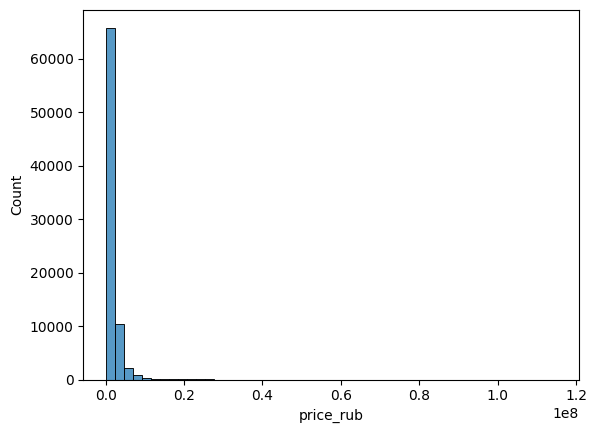

In [28]:
sns.histplot(df['price_rub'], bins=50)

Если взглянуть на максимальное значение ценника, то получим инетересное объявление:

In [31]:
df.loc[df['price_rub'] == df['price_rub'].max()]

,id,price_rub,mark,model,generation,configuration,complectation,body_type,color,displacement,...,owners_count,condition,custom,pts,seller_type,region,city,address,options,description
20556,10809705,115000000,Lada (ВАЗ),2108,NaN,Хэтчбек 3 дв.,NaN,трехдверный хэтчбэк,коричневый,1.5,...,4,среднее,растаможен,дубликат,частник,Тверская область,Конаково,NaN,NaN,Нулями не ошибся !!!! Интересует обмен только ...


In [33]:
pd.set_option('display.max_colwidth', None)
df.loc[df['price_rub'] == df['price_rub'].max(), 'description']

20556    Нулями не ошибся !!!! Интересует обмен только на AURUS SENAT Двигатель: — ВАЗ-21124, 1.6 литра, 16 клапанов; — поршни ВАЗ-21213 Нива с тефлоновым покрытием с увеличенной камерой сгорания; — СЖ 8.1; — ГБЦ Стандарт; — турбина IHI VF29; — впускной ресивер Handmade 4 литра без резки рамки; — форсунки Siemens 630 cc; — насос Walbro 255 л/ч; — выхлоп нержавейка на 60 мм трубе, банка SAAB 9000T; — интеркулер AJS, пайпинг на 57 мм трубе; — блоу-офф Greddy; — КПП Стандарт + винтовая блокировка с преднатягом 6 кг; — мозги Январь 5.1. Подвеска: — винтовые стойки переделанные из стандартных СААЗ, максимально укорочены; — передняя пружина заменена на узкую от Toyota ajs ; — задняя пружина узкая 20кг ; — передние верхние опоры ART Racing на ШС, развал -5°; — верхняя распорка стаканов с дополнительной опорой двигателя; — проставки под шаровые; — привода усиленные ВАЛрейсинг, тонкий справа; — треугольные рычаги, кастор +2°; — поперечина вместо крабов, с "ушами" к опоре двигателя; — передний с

Давайте лучше посмотрим на выбросы..

<Axes: xlabel='log_price', ylabel='Count'>

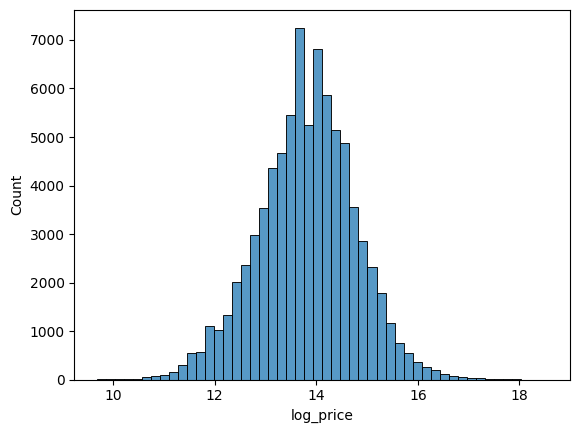

In [41]:
df['log_price'] = np.log1p(df['price_rub'])
sns.histplot(df['log_price'], bins=50)

In [40]:
IQR = df['log_price'].quantile(0.75)-df['log_price'].quantile(0.25)
lower_bound = df['log_price'].quantile(0.25) - 1.5*IQR
upper_bound = df['log_price'].quantile(0.75) + 1.5*IQR
print(lower_bound, upper_bound)

11.398143332079695 16.250228780904028


In [46]:
df['is_outlier'] = (df['log_price'] < lower_bound) | (df['log_price'] > upper_bound)
df['is_outlier'].value_counts()

is_outlier
False    78895
True      1114
Name: count, dtype: int64

<Axes: xlabel='horse_power', ylabel='Count'>

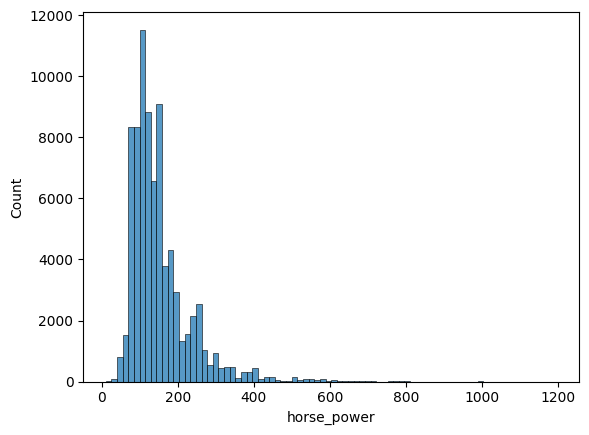

In [52]:
sns.histplot(df['horse_power'], bins=80)

<Axes: xlabel='horse_power', ylabel='Count'>

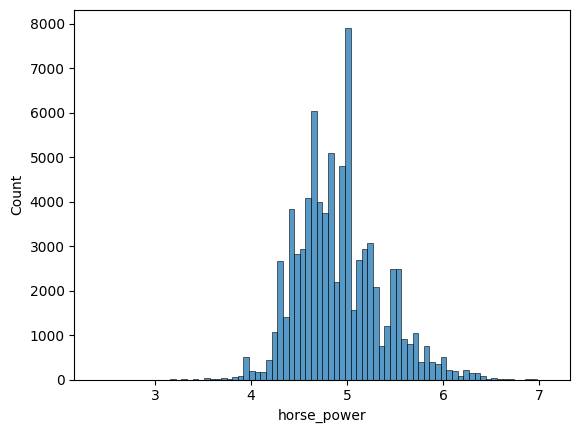

In [53]:
sns.histplot(np.log1p(df['horse_power']), bins=80)

Можно добавить признак, что машина является мощной, если имеет лошадок больше 800. Лучше, чем клиппировать

In [68]:
pd.set_option('display.max_colwidth', 50)
df[df['horse_power']>800]

,id,price_rub,mark,model,generation,configuration,complectation,body_type,color,displacement,...,custom,pts,seller_type,region,city,address,options,description,log_price,is_outlier
9118,12884438,9000000,Dodge,Challenger,III Рестайлинг 2,Купе SRT,NaN,купе,фиолетовый,6.2,...,растаможен,оригинал,частник,Москва и Московская область,Москва,"Мосфильмовская улица, 88к2с4",NaN,Dodge Challenger SRT Hellcat Redeye ценится по...,16.012735,False
13996,16621582,31666000,Mercedes-Benz,S-Класс AMG,IV (W223),Седан,AMG S 63,седан,серый,4.0,...,растаможен,NaN,частник,Москва и Московская область,Москва,NaN,"[""airbag-driver"",""airbag-rear-side"",""lock"",""kn...","Mercedes Benz S6.3 AMG Новый автомобиль , по н...",17.270754,True
22893,11829207,11500000,Tesla,Model S,I Рестайлинг 2,Лифтбек,Model S,лифтбек,чёрный,0.0,...,растаможен,оригинал,частник,Санкт-Петербург и Ленинградская область,Санкт-Петербург,Palace Square,"[""decorative-interior-lighting"",""multi-wheel"",...",Машина новая. Пробег менее 1000км. Карбоновый...,16.257858,True
25576,14249782,50600000,Ferrari,SF90,I,Купе Stradale,NaN,купе,жёлтый,4.0,...,растаможен,оригинал,компания,Москва и Московская область,Москва,"Московская область, Одинцовский городской окру...",NaN,Ferrari SF90 2023 г. Цвет кузова - Giallo Mode...,17.739462,True
28262,14553381,28019952,Mercedes-Benz,S-Класс AMG,IV (W223),Седан,AMG S 63,седан,белый,4.0,...,растаможен,оригинал,компания,Приморский край,Владивосток,"Снеговая улица, 15А","[""airbag-driver"",""airbag-rear-side"",""lock"",""kn...",Под заказ. ЦЕНА С НДС INSOFT MOTORS ООО «ИНСОФ...,17.148427,True
35968,16072097,21000000,BYD,Yangwang U8,NaN,Внедорожник 5 дв.,NaN,пятидверный внедорожник,синий,2.0,...,растаможен,оригинал,частник,Иркутская область,Иркутск,Иркутская область,NaN,Автомобиль в наличии. комплектация максимальная.,16.860033,True
38399,10958531,63840000,Ferrari,SF90,I,Купе Stradale,Индивидуальная,купе,красный,4.0,...,растаможен,NaN,компания,Москва и Московская область,Москва,Барвиха Luxury Village,NaN,Цвет кузова- Rosso Fuoco Цвет салона - Nero S...,17.971891,True
41495,10223640,59100000,Ferrari,SF90,I,Купе Stradale,Индивидуальная,купе,красный,4.0,...,растаможен,NaN,компания,Москва и Московская область,Москва,Барвиха Luxury Village,NaN,Цвет кузова- Rosso Corsa Цвет салона - Nero Си...,17.894741,True
42054,10578359,15500000,GMC,Hummer EV,NaN,Пикап Двойная кабина,NaN,пикап,белый,0.0,...,растаможен,оригинал,компания,Москва и Московская область,Москва,"Кутузовский проспект, 2/1с1 здание конгресс па...",NaN,АВТОМОБИЛЬ В НАЛИЧИИ! ВАЖНО!!! Находится на га...,16.556351,True
43950,14553369,26463288,Mercedes-Benz,S-Класс AMG,IV (W223),Седан,AMG S 63,седан,чёрный,4.0,...,растаможен,оригинал,компания,Приморский край,Владивосток,"Снеговая улица, 15А","[""airbag-driver"",""airbag-rear-side"",""lock"",""kn...",Под заказ. ЦЕНА С НДС INSOFT MOTORS ООО «ИНСОФ...,17.091269,True


In [56]:
df['configuration'].value_counts()

configuration
Седан                     27387
Внедорожник 5 дв.         23051
Хэтчбек 5 дв.              9974
Универсал 5 дв.            4005
Лифтбек                    2782
                          ...  
Родстер Spider                1
Кабриолет Cooper S            1
Седан 1201                    1
Родстер Volante               1
Минивэн Master Edition        1
Name: count, Length: 247, dtype: int64

С километрами можно сделать биннинг - разбить на корзины по разным отрезкам км

<Axes: xlabel='km_age', ylabel='Count'>

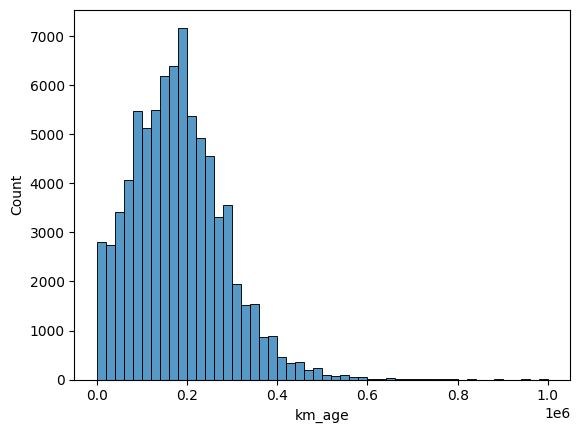

In [67]:
sns.histplot(df['km_age'], bins=50)